In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Step 1: Set up parameters
S0 = 100  # initial stock price
K = 100  # strike price (ATM)
sigma = 0.30  # implied and realized volatility
T = 1  # time to maturity in years
r = 0  # risk-free rate
mu = 0  # drift
N = 10000  # number of simulations

In [3]:
# Step 2: Simulate stock paths
np.random.seed(0)  # for reproducibility
Z = np.random.normal(0, 1, N)  # standard normal random variables
ST = S0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # GBM formula

In [4]:
# Step 3: Calculate the straddle payoff
call_payoff = np.maximum(ST - K, 0)
put_payoff = np.maximum(K - ST, 0)
straddle_payoff = call_payoff + put_payoff

In [5]:
# Step 4: Calculate the straddle premium using Black-Scholes formula
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
call_premium = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
put_premium = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
straddle_premium = call_premium + put_premium

In [6]:
# Step 5: Calculate returns
returns = straddle_premium - straddle_payoff

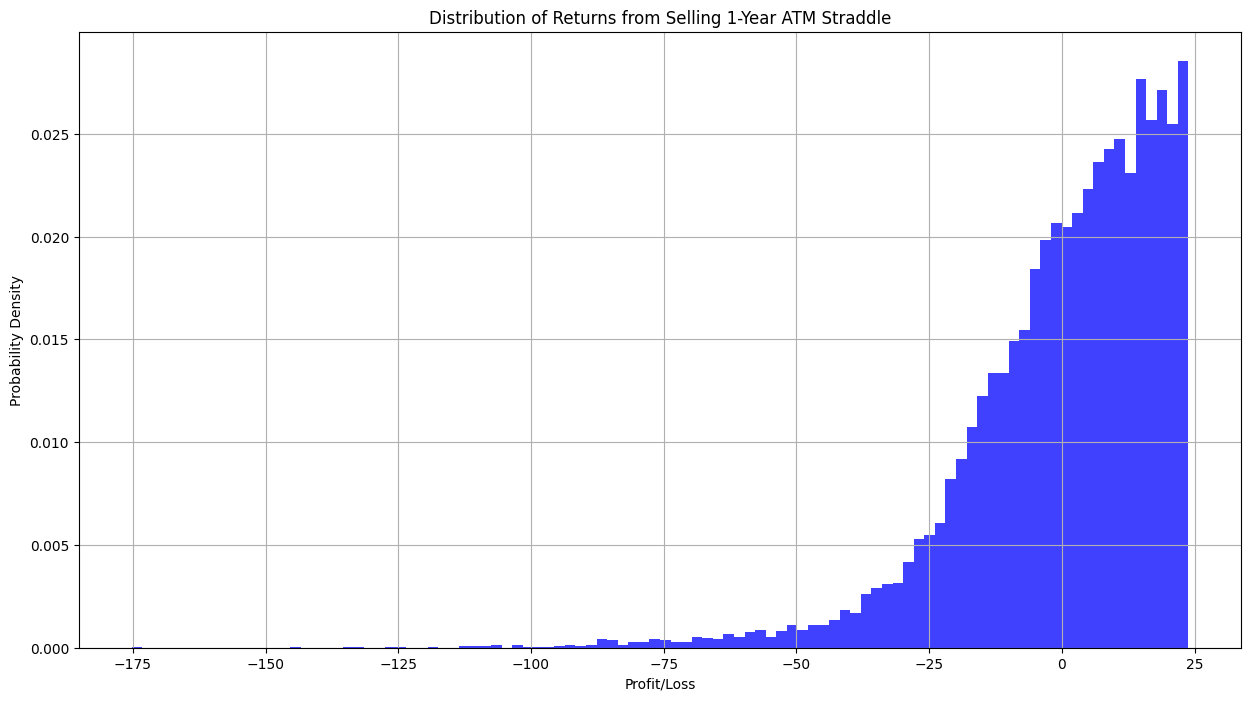

In [8]:
# Step 6: Plot the distribution of returns
fig = plt.figure(figsize=(15, 8))
plt.hist(returns, bins=100, density=True, alpha=0.75, color='blue')
plt.xlabel('Profit/Loss')
plt.ylabel('Probability Density')
plt.title('Distribution of Returns from Selling 1-Year ATM Straddle')
plt.grid(True)
plt.show()